<a href="https://colab.research.google.com/github/Shashi18/SmartHome-Changing-Human-Behavior/blob/master/Parallel_SHS_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:


# !pip install -q --upgrade ipython
# !pip install -q --upgrade ipykernel
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import math
import random
!pip install pythermalcomfort
from pythermalcomfort.models import pmv_ppd
from sklearn.preprocessing import KBinsDiscretizer
tempBins = KBinsDiscretizer(n_bins=31, encode='ordinal', strategy='uniform')
tempBins.fit(np.linspace(15, 30, 30).reshape(-1,1))
pmvBins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
pmvBins.fit(np.linspace(-3.5, 3.5, 15).reshape(-1,1))

def logPlot(model, Human_reward, shs_reward):
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(18, 5)
    sns.set(font_scale=1, palette='bright')
    sns.set_style("ticks")
    x0 = np.linspace(0, len(shs_reward), len(shs_reward))
    sns.lineplot(x0, Human_reward, ax=ax[0], color='blue', label='Human Model')
    sns.lineplot(x0, shs_reward, ax=ax[0], color='black', label = 'SHS Model')
    ax[0].set(xlabel='Episodes', ylabel='Reward')
    task = []
    reward = []
    SH_task = []
    r = 0
    for i in model.PlotGraph[:5000]:
        if i[0] != 'SH':
            if i[0] in [3, 4, 5]:
                task.append(i[0])
                reward.append(i[-2])
            else:
                task.append(i[0])
                reward.append(i[2])
        else:
            SH_task.append(i[1])
    x = np.linspace(0, len(task), len(task))
    ax[1].grid(False)
    sns.set_style("ticks")
    sns.lineplot(x, task, ax=ax[1], linewidth=2, color='blue', label='Task Switching')
    ax[1].legend(loc='upper right')
    ax2 = ax[1].twinx()
    ax2.grid(False)
    sns.set_style("ticks")
    sns.lineplot(x, reward, ax=ax2, linewidth=2, color='green', label='Rewards')#, linestyle='--')
    ax2.legend(loc='upper left')
    ax[1].set_xlabel('Timesteps')
    ticks = [5, 4, 3, 2, 1, 0]
    labels = ['Set 2','Set 1','Set 0','Activity 2','Activity 1','Activity 0']
    ax[1].set_yticks(ticks)
    ax[1].set_yticklabels(labels)
    ax2.set(ylabel='Reward/ CostL In Green')
    if not sh.train:
        ax3 = ax[1].twinx()
        ax3.grid(False)
        ax3.set_yticks([])
        x = np.linspace(0, len(SH_task), len(SH_task))
        sns.lineplot(x, SH_task, ax=ax2, linewidth=2, color='red')
    if model.flag == 1:
        file_name = "Ha_Plot_" +str(quack) + ".pdf" 
    else:
        file_name = "Hb_Plot_" +str(quack) + ".pdf" 
    fig.savefig(file_name)


/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [ ]:
#@title

def logPlotSHS(model, Human_reward, shs_reward):
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(18, 5)
    sns.set(font_scale=1, palette='bright')
    sns.set_style("ticks")
    x0 = np.linspace(0, len(shs_reward), len(shs_reward))
    sns.lineplot(x0, Human_reward, ax=ax[0], color='blue', label='Human Model')
    sns.lineplot(x0, shs_reward, ax=ax[0], color='black', label = 'SHS Model')
    ax[0].set(xlabel='Episodes', ylabel='Reward')
    task = []
    reward = []
    SH_task = []
    r = 0
    for i in model.PlotGraph[:5000]:
        if i[0] != 'SH':
            if i[0] in [3, 4, 5]:
                task.append(i[0])
                reward.append(i[-2])
            else:
                task.append(i[0])
                reward.append(i[2])
        else:
            SH_task.append(i[1])
    x = np.linspace(0, len(task), len(task))
    ax[1].grid(False)
    sns.set_style("ticks")
    sns.lineplot(x, task, ax=ax[1], linewidth=2, color='blue', label='Task Switching')
    ax[1].legend(loc='upper right')
    ax2 = ax[1].twinx()
    ax2.grid(False)
    sns.set_style("ticks")
    sns.lineplot(x, reward, ax=ax2, linewidth=2, color='green', label='Rewards')# , linestyle='--')
    ax2.legend(loc='upper left')
    ax[1].set_xlabel('Timesteps')
    ticks = [5, 4, 3, 2, 1, 0]
    labels = ['Set 2','Set 1','Set 0','Activity 2','Activity 1','Activity 0']
    ax[1].set_yticks(ticks)
    ax[1].set_yticklabels(labels)
    ax2.set(ylabel='Reward/ CostL In Green')
    if not sh.train:
        ax3 = ax[1].twinx()
        ax3.grid(False)
        ax3.set_yticks([])
        x = np.linspace(0, len(SH_task), len(SH_task))
        sns.lineplot(x, SH_task, ax=ax2, linewidth=2, color='red')
    if model.flag == 1:
        file_name = "Ha_Plot_SHS" +str(quack) + ".pdf" 
    else:
        file_name = "Hb_Plot_SHS" +str(quack) + ".pdf" 
    fig.savefig(file_name)


In [3]:

import asyncio
import nest_asyncio
nest_asyncio.apply()
np.set_printoptions(suppress=True, precision=6)
rootState = []
# for t0 in range(40):
#     for t1 in range(40):
#         for t2 in range(40):
#             var = (t0 << 20) | (t1 << 10) | t2
#             rootState.append(var)
for t0 in range(40):
    rootState.append(t0) 
for t1 in range(40):
    x1 = t1 + 40
    rootState.append(x1) 
for t2 in range(40):
    x2 = t2 + 80
    rootState.append(x2)   

taskState = []
for task in range(3):
    for time in range(40):
        for temp in range(15, 31):
            #for hum in range(30, 71, 5):
            x = (task << 20) | (time << 10) | temp
            taskState.append(x)

PMVstate = []
for task in range(3):
    for temp in range(15, 31):
        #for hum in range(30, 71, 5):
        PMVstate.append((task << 10) | temp)


class HumanModel:
    def __init__(self, flag, lr=0.01, gamma=[0.9, 0.9, 0.9], pmv = [1, 1, 1]):
        self.flag = flag
        self.temp, self.hum = env.getTH(0)
        self.pA_npA = nA = 13 # All Primitive + Non- Primiitive actions
        self.statespace = SS = 64000
        self.Qr = np.zeros((nA, SS))               # Value Function
        self.Qc = np.zeros((nA, SS, nA))           # Completion Rewards Qc
        self.Qe = np.zeros((nA, SS, nA))           # Exit Rewards Qe
        self.epsilon = 0.9
        self.alpha = lr
        self.alpha_0 = lr
        self.gamma = gamma
        self.sum = 0        
        self.done = False                           # Termination Indicator
        self.cTime = [0, 0, 0]                      # Current Time
        self.time = [0, 0, 0]                       # Next Time
        #self.nState = [0, 0, 0, 0, 0, 0]            # Stores next states
        self.nState = [0, 0, 0, self.getPMVstate(3), self.getPMVstate(4), self.getPMVstate(5)]
        self.QrCopy = self.Qr.copy()                # Copy Value Function for Recursive updates of non-primitive actions
        self.taskStack = []                         # Stores completed tasks and ongoing tasks
        self.pmv = []                               # Stores PMV variation
        self.metabolism = pmv                       # Metabolism indices
        self.logA = []                               # For LOG purpose
        self.PlotGraph = []                         # For Plotting
        self.initTH = []                             # Store initial temperatures
        self.logB = []                              # For LOG purpose
        self.discrete_pmv = -1                      # Stores discrete PMV
        self.curr_pmv, self.prev_pmv, self.seed = 0, 0, 0 # Stores current, previous PMV (continuous values)
        self.timer = 140
        self.lr = 0.2
        self.sh_reward = 0
        self.state_temp = np.ones([64000, 1]) * 18

        activity0 = self.task0 = 0  # Non Primitive Action
        activity1 = self.task1 = 1  # Non Primitive Action
        activity2 = self.task2 = 2  # Non Primitive Action
        setTH0 = self.adjustTH0 = 3    # Non Primitive Action
        setTH1 = self.adjustTH1 = 4
        setTH2 = self.adjustTH2 = 5
        root = self.root = 6    # Primitive Action
        incT = self.incT = 7
        decT = self.decT = 8
        incH = self.incH = 9
        decH = self.decH = 10
        cont = self.cont = 11   # Primitive Action
        leave = self.leave = 12   # Primitive Action



        self.graph = [
            (cont, leave, setTH0), # Activity 0
            (cont, leave, setTH1), # Activity 1
            (cont, leave, setTH2), # Activity 2
            (incT, decT),# incH, decH),
            (incT, decT),# incH, decH),
            (incT, decT),# incH, decH),
            (activity1, activity0, activity2), #Root --> Physical Activity, Watching TV, Sleeping/Rest
            set(), # Leave
            set(), # Cont
            set(), # Temp1
            set(), # Temp2
            set(),
            set()
        ]

    def not_available(self, a):
        if self.temp == 15 and a==7:
            return True
        elif self.temp == 30 and a==8:
            return True
        elif self.hum == 30 and a==9:
            return True
        elif self.hum == 70 and a==10:
            return True
        else:
            return False

    def SHS(self, i):
        if sh.train:
            action = sh.getAction(self.flag)
            award = 0 if i in [7, 8, 9, 10] and i == action + 7 else 0 if i not in [7, 8, 9, 10] and action == 2 else -1
            sh.step(award, np.mean(self.time)==39, i)
        else:
            action = sh.getAction(self.flag)
            self.temp, self.hum = env.getTH(action+7)
            if i in [7, 8, 9, 10]:
                award = 0 if i==action else -1
                sh.step(award, np.mean(self.time)==39)
            else:
                award = 0 if action==4 else -1
                sh.step(award, np.mean(self.time)==39)
                
    def reset(self):
        self.sh_reward = 0
        self.state_temp = np.ones([64000, 1]) * 18
        self.temp, self.hum = env.getTH(0) #random.randint(20, 25)
        self.time = [0, 0, 0]
        self.cTime = [0, 0, 0]
        self.nState = [0, 0, 0, self.getPMVstate(3), self.getPMVstate(4), self.getPMVstate(5)]
        self.sum = 0
        self.done = False
        self.taskStack = []
        self.pmv = []
        self.taskMemory = set()
        self.countdown = 120
        self.pmv_time = 0
        self.logA = []
        self.PlotGraph = []
        self.initTH = []
        self.logB = []
        self.discrete_pmv = -1
        self.graph[6] = tuple(sorted([1, 0, 2], key = lambda x: random.random()))
        self.curr_pmv, self.prev_pmv = -1, -1
        self.timer = 140

    def rootState(self, task):
        var = (self.time[0] << 20) | (self.time[1] << 10) | self.time[2]
        #if np.mean(self.time) == 39:
        return rootState.index(var)

    def getPmv(self, task):
        temp, hum = env.getTH(0)
        cloth = [0.5, 0.67, 0.36]
        #Met: 1   [26, 29] (-0.15, 0.5)
        #Met: 1.2 [22, 25] (-0.5, 0.3)
        #Met: 1.4 [19, 22] (-0.5, 0.15)
        #Met: 1.8 [15, 17] (-0.5, 0)
        met = self.metabolism[task]
        threshold_L = 0.15 if met==1 else 0.5 if met in [1.2, 1.4, 1.8] else 0.3
        threshold_U = 0.5 if met==1 else 0.3 if met==1.2 else 0.15 if met==1.4 else 0 if met==1.8 else 0.3
        pmv =  pmv_ppd(tdb=temp, tr=25, vr=0.0, rh=50, met=self.metabolism[task], clo=0.5, wme=0, standard="ASHRAE")['pmv']
        if self.flag > 2: #3 Means Human Model C with different reward structure
            threshold = 0.25
            terminal = 0 if -0.25 + threshold<=pmv<=0.25 + threshold else -1 if (0.25+ threshold <pmv<=1 + threshold or -1 + threshold<=pmv<-0.25+ threshold) else -2 if(1+ threshold<pmv<=1.5+ threshold or -1.5+ threshold<=pmv<-1+ threshold) else -3 ## I MADE CHANGE HERE
        else: 
            terminal = 0 if -threshold_L<=pmv<=threshold_U else -1 if (threshold_U<pmv<=1 or -1<=pmv<-threshold_L) else -2 if(1<pmv<=1.5 or -1.5<=pmv<-1) else -3
        return terminal, pmv

    def getState(self, time, task):
        temp, hum = env.getTH(0)
        encoded_state = (task << 20) | (time << 10) | temp
        state = taskState.index(encoded_state)
        return state

    def getPMVstate(self, i):
        temp, hum = env.getTH(0)
        encoded_state = ((i-3) << 10) | temp
        state = PMVstate.index(encoded_state)
        return state
    
    # Maps child level state to Root level state 
    def trueStates(self, i, statesVisited, a):
        if i != self.root:
            return statesVisited
        root_states = []
        for S in statesVisited:
            r_s, temp = self.mapUP(self.root, S, a)
            self.state_temp[r_s] = temp
            root_states.append(r_s)
        return list(dict.fromkeys(root_states))
        #return root_states

    def task_reward(self, task, time, action):
        if action not in [self.cont, self.leave]:
            raise ValueError('Wrong action passed')
            return
        self.timer -= 1
        ###
        if task == 0:
            reward = [0 for i in range(40)]
            left = [i if i%5==0 else 0 for i in range(40)]
            right = [40-i if i%5==0 else 0 for i in range(40)]
            reward = [min(left[i], right[i]) for i in range(40)]
            # penalty = [10 if 0<=i<6 else 8 if 6<i<11 else 6 if 11<i<16 else 4 if 16<i<21 else 3 if 21<i<26 else 2 if (26<i<31 or 31<i<39) else 0 for i in range(40)]
            penalty = [1 if 0<=i<6 else 3 if 6<i<11 else 5 if 11<i<16 else 9 if 16<i<21 else 11 if 21<i<26 else 2 if 26<i<31 else 1 if 31<i<39 else 0 for i in range(40)]
            return reward[time] if action == self.cont else -penalty[time] 
        elif task == 1:
            rew = 25
            reward = []
            for i in range(40):
                if ((i-1)%15==0 or (i-1)%15==1):
                    reward.append(rew)
                    if (i-1)%15==1:
                        rew = max(rew-10, 0)
                else:
                    reward.append(0)
            reward[31] = reward[32] = 0
            reward[37] = reward[38] = 5
            penalty = [10 if(0<=i<3) else 2 if (3<i<10 or 18<i<30) else 8 if (9<i<18) else 4 if(30<=i<39) else 0 if (i==18 or i==33 or i==39) else 0  for i in range(40)]
            return reward[time] if action == self.cont else -penalty[time] 
        else:
            reward = [0 for i in range(40)]
            penalty = [2 if 0<=i<7 else 4 if 7<i<14 else 2.5 if 14<i<22 else 1 if 22<i<27 else 0.25 if 27<i<39 else 0 for i in range(40)]
            penalty = [3 if 0<=i<7 else 8 if 7<i<14 else 6 if 14<i<22 else 4 if 22<i<27 else 2 if 27<i<39 else 0 for i in range(40)]
            reward[5], reward[6], reward[12], reward[13], reward[20], reward[21], reward[25], reward[26], reward[37], reward[38], reward[39] = 8, 8, 16, 16, 10, 10, 4, 4, 24, 24, 0
            return reward[time] if action == self.cont else -penalty[time]

    # This is Task 0 #
    def task_0(self, action):
        # For continuing the task
        if action==self.cont:
            if self.time[0] == 39:
                self.cTime = self.time.copy()
                net_reward = self.task_reward(0, self.time[0], self.cont) + self.getPmv(0)[0]# == 0 else self.getPmv(0)[0]
                self.done = True
            else:
                self.cTime = self.time.copy()
                net_reward = self.task_reward(0, self.time[0], self.cont) + self.getPmv(0)[0]# == 0 else self.getPmv(0)[0]
                self.time[0] += 1
                self.nState[0] = self.getState(self.time[0], 0)
                self.done = False
        # For Leaving the task
        elif action==self.leave:
            if self.flag == 3: # Human Model C : Leaving 
                net_reward = self.task_reward(0, self.time[0], self.leave) - self.getPmv(0)[0]
            else:
                net_reward = self.task_reward(0, self.time[0], self.leave)
            self.time[0] += 1
            self.nState[0] = self.getState(self.time[0], 0)
            self.done = True

        return net_reward


    # This is Task 1
    def task_1(self, action):
        # For continuing the task
        if action==self.cont:
            if self.time[1] == 39:
                self.cTime = self.time.copy()
                net_reward = self.task_reward(1, self.time[1], self.cont) + self.getPmv(1)[0]# == 0 else self.getPmv(1)[0]
                self.done = True
            else:
                self.cTime = self.time.copy()
                net_reward = self.task_reward(1, self.time[1], self.cont) + self.getPmv(1)[0]# == 0 else self.getPmv(1)[0]
                self.time[1] += 1
                self.nState[1] = self.getState(self.time[1], 1) # + 1240

                self.done = False
        # For Leaving the task
        elif action==self.leave:
            if self.flag == 3: # Human Model C 
                net_reward = self.task_reward(1, self.time[1], self.leave) - self.getPmv(1)[0]
            else:
                net_reward = self.task_reward(1, self.time[1], self.leave)
            self.time[1] += 1
            self.nState[1] = self.getState(self.time[1], 1)
            self.done = True

        return net_reward

    # This is Task 2
    def task_2(self, action):
        #For continuing the task
        if action==self.cont:
            if self.time[2] == 39:
                self.cTime = self.time.copy()
                net_reward = self.task_reward(2, self.time[2], self.cont) + self.getPmv(2)[0]# == 0 else self.getPmv(2)[0]
                self.done = True
            else:
                self.cTime = self.time.copy()
                net_reward = self.task_reward(2, self.time[2], self.cont) + self.getPmv(2)[0]# == 0 else self.getPmv(2)[0]
                self.time[2] += 1
                self.nState[2] = self.getState(self.time[2], 2)
                self.done = False
        
        # For leaving the task
        elif action==self.leave:
            if self.flag == 3:  # Human Model C 
                net_reward = self.task_reward(2, self.time[2], self.leave) - self.getPmv(2)[0]
            else:
                net_reward = self.task_reward(2, self.time[2], self.leave)
            self.time[2] += 1
            self.nState[2] = self.getState(self.time[2], 2)
            self.done = True

        return net_reward

    # This function sets the desired temperature and humidity level
    def changeTH(self, i, action):
        self.timer -= 1
        currentTask = self.taskStack[-1]
        discrete_pmv, pmv = self.getPmv(currentTask)
        #self.away[currentTask] += 1
        #self.pmv.append([pmv, discrete_pmv])
        if discrete_pmv == 0:
            reward, self.done = -1, True
            self.time[currentTask] += 1
            self.nState[currentTask] = self.getState(self.time[currentTask], currentTask)
            self.pmv.append([pmv, discrete_pmv])
        else:
            self.temp, self.hum = env.getTH(action)
            if self.flag == 1:  Hb.temp, Hb.hum = self.temp, self.hum
            else: Ha.temp, Ha.hum = self.temp, self.hum

            self.nState[i] = PMVstate.index((currentTask << 10) | (self.temp))
            for activity_TH in [3, 4, 5]:
                if activity_TH != i:self.nState[activity_TH] = PMVstate.index((activity_TH-3 << 10) | (self.temp))

            self.discrete_pmv, cont_pmv = self.getPmv(currentTask)
            #self.pmv.append(cont_pmv)
            self.curr_pmv = -abs(cont_pmv)
            
            #reward = (self.curr_pmv - self.prev_pmv) if (self.curr_pmv - self.prev_pmv) > 0 else -1
            reward = 0 if (self.curr_pmv - self.prev_pmv) > 0 else -1
            
            self.prev_pmv = self.curr_pmv
            if currentTask != (i-3):
                print('Oh No')
            if self.discrete_pmv==0:
                self.nState[currentTask], self.done = self.getState(self.time[currentTask], currentTask), True
                self.nState[i] = -100
            else:
                self.nState[currentTask], self.done = self.getState(self.time[currentTask], currentTask), True
            self.pmv.append([self.curr_pmv, self.discrete_pmv])
        return reward

    # Decay Rate of Epsilon and Learning Rate
    def decay(self, x, eps):
        q = 6*x
        #if x > 150:
        self.epsilon = max(0.001, math.exp(-5.5*x/(eps-30))) #-max(0.001, math.tanh((x-100)/50))/2+0.5 # max(0.001, math.exp(-5*x/300))
        self.alpha = self.alpha_0*math.exp(-q/eps)
        self.lr = 0.1*math.exp(-6*x/eps)

    # Check whether the node is primitive(non-SMDP) or composite(SMDP)
    def isPrimitive(self, i):
        return True if i > 6 else False

    # Take action
    def step(self, action, act):
        return self.task_0(action) if act==0 else self.task_1(action) if act==1 else self.task_2(action)# if act==2 else self.changeTH(i, action)

    # Checks whether the current SMDP is terminated
    def isTerminal(self, i):
        if self.timer < 0:
            return True
        elif i == self.root:
            return True if np.mean(self.time)==39  else False
        elif i in [self.task0, self.task1, self.task2]:
            return True if self.time[i]==39 else True if self.done else False
        elif i in [3, 4, 5]:
            return self.done
        elif self.isPrimitive(i):
            return True
        else:
            return False

    # Get the current action based on the state for a particular non-primitive node
    def getAction(self, i, s):
        Q, valid_actions, self.QrCopy = np.arange(0), [], self.Qr.copy()
        if i in [3, 4, 5]:
            self.temp, self.hum = env.getTH(0)
            s = PMVstate.index(self.taskStack[-1] << 10 | self.temp)# << 10 | self.hum)
        leftTask = len((np.array([39, 39, 39]) - np.array(self.time))[np.array(([39, 39, 39]) - np.array(self.time))>0])
        for act in self.graph[i]:
            if i==self.root:
                if act in self.taskStack and (self.time[act]==39 or leftTask > 1): continue
                #s = rootState.index(40*act + self.time[0] << 20 | self.time[1] << 10 | self.time[2])
                s = rootState.index(40*act + self.time[act])
                Q = np.concatenate((Q, [self.EvaluateRecursive(act, s, 1) + self.Qc[self.root, s, act]]))
                valid_actions = np.concatenate((valid_actions, [act])) 
            else:
                if i in [3, 4, 5] and self.not_available(act): continue
                Q = np.concatenate((Q, [self.EvaluateRecursive(act, s, 1) + self.Qc[i, s, act] + self.Qe[i, s, act]]))
                valid_actions = np.concatenate((valid_actions, [act])) 

        # random.seed(144)
        if i==self.root and self.taskStack:
            for task in self.taskStack:
                if self.time[task]!=39:
                    self.taskStack.remove(task)

        if random.random() < self.epsilon:
            a = int(np.random.choice(valid_actions))
            self.logA.append("".join(str(var).ljust(6) for var in [i, s, a, Q, valid_actions, self.Qr[a, s], self.time.copy(), 'R']))
            if i==self.root: self.taskStack.append(a)
            return a
        else:
            a = int(valid_actions[np.argmax(Q)])
            self.logA.append("".join(str(var).ljust(6) for var in [i, s, a, Q, valid_actions, self.Qr[a, s], self.time.copy(), 'NR', self.timer]))
            if i==self.root: self.taskStack.append(a)
            return a

    # This function gives the next possible action for the NEXT state thus it is not entered in the LOG
    def argmax(self, i, s):
        Q = np.arange(0)
        actions = []
        leftTask = len((np.array([39, 39, 39]) - np.array(self.time))[np.array(([39, 39, 39]) - np.array(self.time))>0])
        for act in self.graph[i]:
            if i != self.root:
                if i in [3, 4, 5] and self.not_available(act):
                    continue
                Q = np.concatenate((Q, [self.EvaluateRecursive(act, s, 1) + self.Qc[i, s, act] + self.Qe[i, s, act]]))
            else:
                if act in self.taskStack and (self.cTime[act]==39 or leftTask > 1): continue
                s = rootState.index(40*act + self.time[act])
                Q = np.concatenate((Q, [self.EvaluateRecursive(act, s, 1) + self.Qc[i, s, act]]))
            actions = np.concatenate((actions, [act]))
        return int(actions[np.argmax(Q)])

    #Evaluate the Value Decomposition (Qr) of a non-primitive SMDP node. 
    def EvaluateRecursive(self, i, s, flag):
        if self.isPrimitive(i):
            return self.Qr[i, s]
        else:
            valid_action = []
            task_state = self.mapDown(i, s, flag)
            for action in self.graph[i]:
                self.QrCopy[action, task_state] = self.EvaluateRecursive(action, task_state, flag)
                if i in [3, 4, 5] and self.not_available(action): 
                    continue
                else:
                    valid_action.append(action)
            a = np.argmax([self.QrCopy[action, task_state] + self.Qc[i, task_state, action] for action in valid_action])
            return self.QrCopy[valid_action[a], task_state]# + self.Qc[i, task_state, valid_action[a]] 

    # Maps Parent Node state to Child Node state down the Hierarchy
    def mapDown(self, action, index, flag):
        if action in [0, 1, 2]:
            #self.initTH = [self.temp, self.hum] if len(self.initTH) == 0 else self.initTH
            state = rootState[index]
            #print(action, index)
            temp = int(self.state_temp[index][0]) if flag == 0 else self.temp
            if action == 0:
                return taskState.index((action << 20) | state << 10 | temp)
            elif action == 1:
                return taskState.index(action << 20 | (state - 40) << 10 | temp)
            else:
                return taskState.index(action << 20 | (state - 80) << 10 | temp)
        elif action in [3, 4, 5]:
            state = taskState[index]
            task, temp = (state >> 20) & 0xff, state & 0xff
            var = (task << 10) | (temp)
            return PMVstate.index(var)

        elif self.isPrimitive(action):
            return index


    # Maps Child Node state to Parent Node state down the Hierarchy
    def mapUP(self, i, s, a):
        if i in [3, 4, 5] or (i in [0, 1, 2] and self.isPrimitive(a)):
            return s
        elif i in [0, 1, 2] and not self.isPrimitive(a):#a in [3, 4, 5]:       
            temp = PMVstate[s] & 0xff
            #temp, hum = self.initTH[0], self.initTH[1]  ## I have modified here.
            return taskState.index((i << 20) | (self.time[i] << 10) | (temp))
        else:
            time = (taskState[s] >> 10) & 0xff
            temp = taskState[s] & 0xff
            if a == 0:
                return (rootState.index(time), temp)
            elif a == 1:
                return (rootState.index(time + 40), temp)
            else:
                return (rootState.index(time + 80), temp)


    def cost(self, a, s):
        s = rootState[s]
        import math
        time = s - math.floor(s/40)*40
        #return 0
        self.timer += 1
        return self.task_reward(a, time, self.leave)

    # This function updates the Q table for all Tasks when the action was to continue
    # This is separate and not in MAXQ_HO to follow the SMDP routine i.e. updates all visited states at once rather than one by one.
    def update(self, flag, childSeq, i, s_, a_):
        self.QrCopy = self.Qr.copy()
        if len(childSeq) == 0: return
        #root_s, N = self.mapUP(self.root, childSeq[0], i), 1
        N = 1
        for vS in childSeq:
            if vS == s_: continue
            V = 0 if flag == 1 else self.Qr[a_, s_] + self.Qc[i, s_, a_]
            gamma = self.gamma[i] if i != 0 else 0.6
            self.Qc[i, vS, self.cont] = (1-self.alpha)*self.Qc[i, vS, self.cont] + self.alpha*self.gamma[i]**N*V
            N += 1


    # Trains the agent to set correct TH to obtain maximum confort
    def trainPMV(self, i, s, a):
        self.initTH = [self.temp, self.hum]
        retStates, score = [], 0
        max_len = 1 if sh.train else 1
        for episode in range(1):
            #if sh.train: env.reset()
            while not self.isTerminal(i):
                self.SHS(a)
                if not sh.train:
                    temp, hum = env.getTH(0)
                    s = PMVstate.index((self.taskStack[-1] << 10) | (temp))# << 10 | hum)
                    a = self.getAction(i, s)
                retStates.insert(0, s)
                score = self.changeTH(i, a)
                self.Qr[a, s] = (1-self.lr)*self.Qr[a, s] + self.lr*score
                #if episode == 0:
                self.PlotGraph.append([i, a, score, self.Qr[a, s], 0, self.curr_pmv, s])
                _s = self.nState[i]
                if _s != -100: 
                    _a = self.argmax(i, _s)
                    V = 0.99*(self.EvaluateRecursive(_a, _s, 0) + self.Qc[i, _s, _a])
                else:
                    V = 0
                self.Qc[i, s, a] = (1-self.lr)*self.Qc[i, s, a] + self.lr*V
            self.done = False
        self.sum += score
        return retStates
                
    # This is the main function that is called. 
    async def start(self, i, s, task):
        self.reset()
        await self.MAXQ_HO(i, s, task)
    

    #It is recursive and calls itself while travelling in the hierarchy.
    async def MAXQ_HO(self, i, s, task):
        visitedStates = []
        continueStates = []
        ################################# PRIMITIVE ACTIONS ###############################################
        if self.isPrimitive(i):
            self.SHS(i)
            reward = self.step(i, task)
            self.Qr[i, s] = (1-self.alpha)*self.Qr[i, s] + self.alpha*reward
            visitedStates.insert(0, s)
            self.PlotGraph.append([task, i, reward, self.Qr[i, s], 0, self.curr_pmv, s])
            self.sum += reward

        else:
            ######################### COMPOSITE ACTIONS ##################################################
            N = 1
            while not self.isTerminal(i):
                self.temp, self.hum = env.getTH(0)
                a = self.getAction(i, s) 
                s = self.nState[a] if not self.isPrimitive(a) else s # if i == self.root or a in [3, 4, 5] else s
                if not sh.train: self.SHS(i)
                if i in [3, 4, 5]:
                    self.temp, self.hum = env.getTH(0)
                    s = PMVstate.index(self.taskStack[-1] << 10 | self.temp)# << 10 | self.hum)
                    visitedStates = self.trainPMV(i, s, a)
                    self.done = False
                    #print(i, visitedStates)
                    return visitedStates
                await asyncio.sleep(0)
                childSeq = await self.MAXQ_HO(a, s, i)
                s_ = self.nState[i] if i != self.root else s
                a_ = self.argmax(i, s_)
                if i == self.root: s_ = 40*a_ + self.time[a_]
                self.QrCopy = self.Qr.copy()

                if a == self.cont:
                    continueStates, s = childSeq + continueStates, s_
                    if self.time[i] == 39:
                        #continueStates, self.done = childSeq + continueStates, False
                        self.done = False
                        self.update(0, continueStates, i, s_, a_)
                        #print(i, a, continueStates)
                        return continueStates + visitedStates
                    continue
                elif a == self.leave:  
                    self.update(0, continueStates, i, s, self.argmax(i, s)) 
                    visitedStates, s = continueStates + visitedStates, s_
                
                N = 1# if i == self.root else N
                gamma = 0.9 if i in [self.root, self.adjustTH0, self.adjustTH1, self.adjustTH2] else self.gamma[i]
                self.QrCopy = self.Qr.copy()
                seq = []
                #print(i, a, self.trueStates(i, childSeq, a))
                for vS in self.trueStates(i, childSeq, a):
                    state = self.mapUP(i, vS, a) if i != self.root else vS # Child Node to Parent Node Mapping
                    #if (i == self.root or a in [3, 4, 5]): self.Qr[a, state] = self.EvaluateRecursive(a, s) 
                    if a != self.leave:
                        V = 0 if state == 119 else self.EvaluateRecursive(a_, s_, 1) + self.Qc[i, s_, a_] + self.Qe[i, s_, a_] # + self.Qc[i, s_, a_]
                        gamma = 0.9 if i == self.root else gamma
                        self.Qc[i, state, a] = (1-self.alpha)*self.Qc[i, state, a] + self.alpha*gamma**N*V
                    else:
                        self.Qc[i, state, self.cont] = (1-self.alpha)*self.Qc[i, state, self.cont] + self.alpha*gamma**N*(self.EvaluateRecursive(a_, s_, 1) + self.Qc[i, s_, a_])
                        #self.Qc[i, state, self.leave] = 0#(1-self.alpha)*self.Qc[i, state, self.leave] + self.alpha*gamma**N*(self.EvaluateRecursive(a_, s_) + self.Qc[i, s_, a_] + self.Qe[i, s_, a_])
                    if a != a_ and i == self.root:
                    
                        penalize = 0*(self.cost(a_, s_))
                        Qroot, exitState = 0 + penalize + self.EvaluateRecursive(a_, s_, 0) + self.Qc[6, s_, a_], self.mapDown(a, vS, 0)
                        #print(1-self.gamma[a])
                        self.Qe[a, exitState, self.leave] = (1-self.alpha)*self.Qe[a, exitState, self.leave] + self.alpha*(1-self.gamma[a])**N*(Qroot)# + self.Qc[i, s_, a_])
                    N = N + 1 if i not in [3, 4, 5] else 1
                    seq.append(state)
                visitedStates = seq + visitedStates
                s = s_
            self.done = False
        return visitedStates

Episode   0 | Model A:-143.0 | Model B:  0.0 | SHS: -95.0 | e: 1.00000
Episode  20 | Model A:74.0 | Model B:  0.0 | SHS: -56.0 | e: 0.39985
Episode  40 | Model A:253.0 | Model B:  0.0 | SHS: -24.0 | e: 0.15988
Episode  60 | Model A:260.0 | Model B:  0.0 | SHS: -7.0 | e: 0.06393
Episode  80 | Model A:280.0 | Model B:  0.0 | SHS: -2.0 | e: 0.02556
Episode 100 | Model A:280.0 | Model B:  0.0 | SHS: -3.0 | e: 0.01022
Episode 120 | Model A:287.0 | Model B:  0.0 | SHS: -5.0 | e: 0.00409
Episode 140 | Model A:287.0 | Model B:  0.0 | SHS: -3.0 | e: 0.00163
289 0


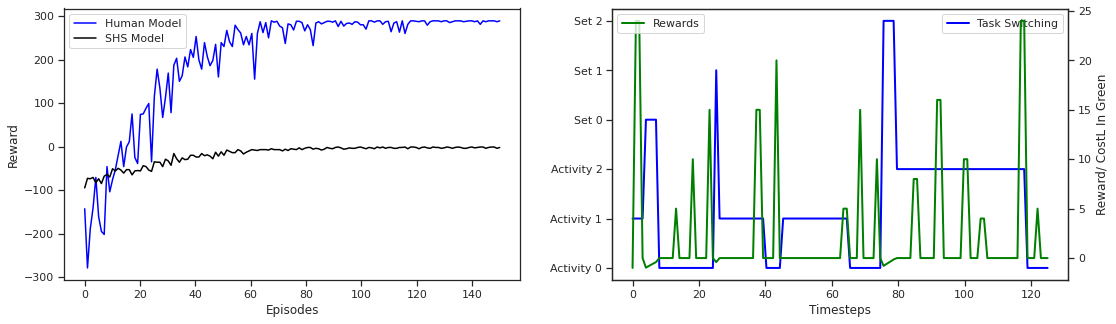

In [100]:
a = []
quack = 0
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
root_node, root_state = 6, 0
train = 1
if __name__ == '__main__':
    random.seed(156)
    if train:
        Ha_gamma, Hb_gamma = 0.95, 0.6
        prev_score = 0
        env = Environment() #1.4, 1.6, 1    1, 1.2, 1.4 #1.6, 1.8, 2 #1.2, 1.4, 1
        pmvB = [1.2, 1.4, 1]
        pmvA = [1, 1.2, 1.4]
        Ha = HumanModel(1, lr = .3, gamma = [Ha_gamma]*3, pmv = pmvB)
        Hb = HumanModel(3, lr = .03, gamma = [Hb_gamma]*3, pmv = [1.5, 1.2, 1.3])
        sh = SHS_(Ha, Hb, AI_states, gamma=0.9, lr=0.1, train = True)
        # sh = SHS(Ha, gamma=0.99, train=True)
        shsA_rewards, Ha_rewards,Hb_rewards, trigger, pmvHa,pmvHb, LOG, epsA = [], [], [],  0, [],  [], [], 150
        s, e = 0, epsA
    else:
        # sh.train = False
        s, e = epsA, epsA+1
    #sns.set(palette='bright')
    for i in range(s, e):
        sh.reset()
        env.reset()
        loop = asyncio.get_event_loop()
        loop.run_until_complete(asyncio.wait([Ha.start(root_node, root_state, None)]))
#                                              Hb.start(root_node, root_state, None)]))

        LOG.append(Ha.logA)
        shA = sh.score
        if not train or e != epsA + 60:
            sh.decay(i, e)
            Ha.decay(i, e)
            Hb.decay(i, e)
        shsA_rewards.append(sh.score)
        Ha_rewards.append(Ha.sum)
        Hb_rewards.append(Hb.sum)
        if i%20==0: 
            print('Episode {:3d} | Model A:{:4.1f} | Model B: {:4.1f} | SHS: {:3.1f} | e: {:3.5f}'.format(i, Ha.sum, Hb.sum, shA, Ha.epsilon)) 
        pmvHa.append(Ha.pmv)
        pmvHb.append(Hb.pmv)
    sns.set_style("ticks")
    if train or e != epsA + 60: 
        logPlot(Ha, Ha_rewards, shsA_rewards)
        #logPlot(Hb, Hb_rewards, shsA_rewards)
    else:
        logPlotSHS(Ha, Ha_rewards, shsA_rewards)
        logPlotSHS(Hb, Hb_rewards, shsA_rewards)
    print(Ha.sum, Hb.sum)
    epsA = e + 1

In [5]:
#@title
class Environment:
    def __init__(self):
        self.temp, self.hum = 22, 50
    def reset(self):
        self.temp, self.hum = 18, 50#np.random.choice(np.arange(15, 30, 1)), 50 #np.random.choice(np.arange(15, 30, 1)), np.random.choice(np.arange(30, 70, 5))
    def getTH(self, action):
        if action==7:
            self.temp = min(30, self.temp + 1)
        elif action==8:
            self.temp = max(15, self.temp - 1)
        elif action==9:
            self.hum = min(70, self.hum + 5)
        elif action==10:
            self.hum = max(30, self.hum - 5)
        else:
            return self.temp, self.hum
        return self.temp, 50

def plot(model):
    t0 = []
    t1 = []
    t2 = []
    for i in model.logA:
        num = int((i.split('[')[0]).split(' ')[0])
        if num == 0:
            t0.append((i.split('[')[0]).split(' ')[5])
        elif num == 1:
            t1.append((i.split('[')[0]).split(' ')[5])
        elif num == 2:
            t2.append((i.split('[')[0]).split(' ')[5])
        else:
            continue
    #len([i for i in Ha.Qc[1, :, 4]])
    l = min(len(t0), len(t1), len(t2))
    # x1 = np.linspace(0, len(t0), len(t0))
    # x2 = np.linspace(0, len(t1), len(t1))
    # x3 = np.linspace(0, len(t2), len(t2))
    x1 = np.linspace(0, l, l)
    x2 = np.linspace(0, l, l)
    x3 = np.linspace(0, l, l)
    #print(len(x), len(t1), len([Ha.Qc[0, int(i), 4] for i in t0]))
    fig, ax = plt.subplots(1, 3)
    fig.set_size_inches(13,4)
    sns.set_style('darkgrid')
    sns.lineplot(x1, [model.Qr[11, int(i)] + model.Qc[0, int(i), 11] + model.Qe[0, int(i), 11] for i in t0][-l:], label='Activity 0', ax=ax[0])
    sns.lineplot(x2, [model.Qr[11, int(i)] + model.Qc[1, int(i), 11] + model.Qe[1, int(i), 11] for i in t1][-l:], label='Activity 1', ax=ax[1])
    sns.lineplot(x3, [model.Qr[11, int(i)] + model.Qc[2, int(i), 11] + model.Qe[2, int(i), 11] for i in t2][-l:], label='Activity 2', ax=ax[2])
    sns.lineplot(x1, [model.Qr[12, int(i)] + model.Qe[0, int(i), 12] + model.Qe[0, int(i), 12] for i in t0][-l:], label='Activity 0', ax=ax[0])
    sns.lineplot(x2, [model.Qr[12, int(i)] + model.Qe[1, int(i), 12] + model.Qe[1, int(i), 12] for i in t1][-l:], label='Activity 1', ax=ax[1])
    sns.lineplot(x3, [model.Qr[12, int(i)] + model.Qe[2, int(i), 12] + model.Qe[2, int(i), 12] for i in t2][-l:], label='Activity 2', ax=ax[2])
    ax[0].set(xlabel="States", ylabel="Activity Completion Expected Q values")
    ax[1].set(xlabel="States", ylabel="External Activity Expected Q values")
    plt.tight_layout()
    file_ = "QcQeHa" if model.flag==1 else "QcQeHb" if model.flag==2 else "QcQeHc"
    fig.savefig(file_+".pdf")

# taskState = []
def plotAvg(model):
    fig, ax = plt.subplots(1, 3)
    fig.set_size_inches(12, 4)
    t0, t1, t2, f0, f1, f2 = [], [], [], [], [], []
    m0, m1, m2 =[], [], []
    group = [t0, t1, t2]
    groupe = [f0, f1, f2]
    groupt = [m0, m1, m2]
    r_0, r_1, r_2 = [], [], []
    for task in range(3):
        for time in range(40):
            group[task].append(0)
            groupe[task].append(0)
            groupt[task].append(0)
            for temp in range(15, 31):
                #for hum in range(30, 71, 5):
                hum = 50
                x = (task << 20) | (time << 10) | (temp)# | hum
                group[task][time] +=  model.Qc[task, taskState.index(x), 11] + 0*model.Qr[11, taskState.index(x)]
                groupe[task][time] += model.Qe[task, taskState.index(x), 12] + 0*model.Qr[12, taskState.index(x)] 
            #groupe[task][time] = groupe[task][time]
            groupt[task][time] = group[task][time] + groupe[task][time]
        print('Activity',task,'mean C', np.mean(group[task][:]))
        print('Activity',task,'mean E', np.mean(groupe[task][:]))


    x1 = np.linspace(0, len(t0), len(t0))
    sns.set_style("ticks")
    sns.lineplot(x1, t0, label="Activity0 Qc", ax=ax[0])
    #sns.lineplot(x1, m0, label="Tot", ax=ax[0])
    x1 = np.linspace(0, len(t1), len(t1))
    sns.lineplot(x1, t1, label="Activity1 Qc", ax=ax[1])
    #sns.lineplot(x1, m1, label="Tot", ax=ax[1])
    x1 = np.linspace(0, len(t2), len(t2))
    sns.lineplot(x1, t2, ax=ax[2], label="Activity2 Qc")
    #sns.lineplot(x1, m2, label="Tot", ax=ax[2])
    x1 = np.linspace(0, len(f0), len(f0))
    sns.lineplot(x1, f0, label="Activity0 Qe", ax=ax[0])
    x1 = np.linspace(0, len(f1), len(f1))
    sns.lineplot(x1, f1,  label="Activity1 Qe", ax=ax[1])
    x1 = np.linspace(0, len(f2), len(f2))
    sns.lineplot(x1, f2, ax=ax[2], label="Activity2 Qe")
    sns.set_style("ticks")
    ax[0].set(ylabel="Expected Q Reward")
    ax[1].set(xlabel="Timesteps")
    ax[1].set_title('Model $H_D$ With SHS')
    #ax[2].set(xlabel="Timesteps")
    plt.tight_layout()
    file_name = "Model" + str(model.flag) + ".pdf"
    fig.savefig(file_name)

    fig, ax = plt.subplots(1, 3)
    x = np.linspace(0, 40, 40)
    r1, r2, r3 = [], [], []
    for state in range(120):
        if state < 40:
            r1.append(model.EvaluateRecursive(0, state, 1) + model.Qc[6, state, 0])
        elif state < 80:
            r2.append(model.EvaluateRecursive(1, state, 1) + model.Qc[6, state, 1])
        else:
            r3.append(model.EvaluateRecursive(2, state, 1) + model.Qc[6, state, 2])
    sns.set_style("ticks")
    sns.lineplot(x, r1, ax=ax[0], label='Activity 0', color='r')
    sns.lineplot(x, r2, ax=ax[1], label='Activity 1', color='g')
    sns.lineplot(x, r3, ax=ax[2], label='Activity 2', color='b')
    ax[0].set_ylabel("Expected Q Reward")
    ax[1].set_xlabel('Timesteps')
    fig.set_size_inches(13, 4)


    
AI_states = []
for task in range(3):
    for temp in range(15, 31):
        for hum in range(30, 71, 5):
            AI_states.append((task << 20) | (temp << 10) | hum)
class SHS_:
    def __init__(self, HumanA, HumanB, states, gamma=0.99, lr=0.01, train = True):
        self.temp, self.hum = env.getTH(0)
        self.activity = 0
        self.Q = np.zeros([1900, 3])
        self.alpha = lr
        self.alpha_0 = lr
        self.epsilon = 0.5
        self.gamma = gamma
        self.reward = 0
        self.states = states
        self.h_action = 0
        self.cState = 0
        self.nState = 0
        self.score = 0
        self.rew = []
        self.train = train
        self.HumanA = HumanA
        self.HumanB = HumanB
        self.flag = 0
        self.time = 0
        self.Ha = HumanA.flag
        self.Hb = HumanB.flag

    def reset(self):
        self.temp, self.hum = env.getTH(0)
        self.score = 0
        self.time = 0

    def freeze(self, model):
        self.alpha, self.train = 0, False
        self.Human = model

    def getState(self):
        self.temp, self.hum = env.getTH(0)
        self.activity = self.HumanA.taskStack[-1] if self.flag==self.Ha else self.HumanB.taskStack[-1]
        val = (self.activity << 20) | (self.temp << 10) | self.hum
        return self.states.index(val)

    def step(self, reward, done, human_action):
        self.score += reward
        nState = self.getState()
        cState = self.cState
        if done:
            val = np.array((reward))
        else:
            val = np.array((reward + self.gamma*np.max(self.Q[nState, :])))
        #print(cState, self.action)
        self.Q[cState, self.action] = (1-self.alpha)*self.Q[cState, self.action] + self.alpha*val

    def decay(self, x, eps):
        q = 6*x
        self.alpha = self.alpha_0*math.exp(-q/eps)
        self.epsilon = max(0.001, 0.5*math.exp(-q/eps))     

    def getAction(self, flag):
        self.flag = flag
        self.cState = self.getState()
        if self.train:
            if random.random() < self.epsilon:
                self.action = random.randint(0, 2)
                return self.action
            else:
                self.action =  np.argmax(self.Q[self.cState, :])
                return self.action
        else:
            state = self.getState()
            self.action =  np.argmax(self.Q[state, :])
            return self.action

In [101]:
import copy
Hb_back = copy.deepcopy(Ha)
Hb = copy.deepcopy(Hb_back)
Ha = copy.deepcopy(Ha_back)
Hb.flag = 2
# plotAvg(Ha)
# sh.train
# Hb.flag = 2


In [ ]:
#@title
a = []
quack = 0
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
root_node, root_state = 6, 0
train = 1
#Hb_pmv = np.array(Ha_pmv) + 0.01 * np.array(Ha_pmv)
if __name__ == '__main__':
    #random.seed(156)
    if train:
        Ha_gamma, Hb_gamma = 0.95, 0.6
        prev_score = 0
        env = Environment() #1.4, 1.6, 1    1, 1.2, 1.4 #1.6, 1.8, 2
        Ha = HumanModel(1, lr = .3, gamma = [Ha_gamma]*3, pmv = [1, 1.2, 1.4])
        Hb = HumanModel(3, lr = .03, gamma = [Hb_gamma]*3, pmv = [1.5, 1.2, 1.3])
        # sh = SHS_(Ha, Hb, AI_states, gamma=0.9, lr=0.1, train = True)
        sh = SHS(Ha, gamma=0.99, train=True)
        shsA_rewards, Ha_rewards,Hb_rewards, trigger, pmvHa,pmvHb, LOG, epsA = [], [], [],  0, [],  [], [], 150
        s, e = 0, epsA
    else:
        # sh.train = False
        s, e = epsA, epsA+1
    #sns.set(palette='bright')
    for i in range(s, e):
        sh.reset()
        env.reset()
        loop = asyncio.get_event_loop()
        loop.run_until_complete(asyncio.wait([Ha.start(root_node, root_state, None)]))
#                                              Hb.start(root_node, root_state, None)]))

        LOG.append(Ha.logA)
        shA = sh.score
        if not train or e != epsA + 60:
            sh.decay(i, e)
            Ha.decay(i, e)
            Hb.decay(i, e)
        shsA_rewards.append(sh.score)
        Ha_rewards.append(Ha.sum)
        Hb_rewards.append(Hb.sum)
        if i%20==0: 
            print('Episode {:3d} | Model A:{:4.1f} | Model B: {:4.1f} | SHS: {:3.1f} | e: {:3.5f}'.format(i, Ha.sum, Hb.sum, shA, Ha.epsilon)) 
        pmvHa.append(Ha.pmv)
        pmvHb.append(Hb.pmv)
    sns.set_style("ticks")
    if train or e != epsA + 60: 
        logPlot(Ha, Ha_rewards, shsA_rewards)
        #logPlot(Hb, Hb_rewards, shsA_rewards)
    else:
        logPlotSHS(Ha, Ha_rewards, shsA_rewards)
        logPlotSHS(Hb, Hb_rewards, shsA_rewards)
    print(Ha.sum, Hb.sum)
    epsA = e + 1

In [ ]:
#Met: 1   [26, 29] (-0.15, 0.5)
#Met: 1.2 [22, 25] (-0.5, 0.3)
#Met: 1.4 [19, 22] (-0.5, 0.15)
#Met: 1.8 [15, 17] (-0.5, 0)

for i in range(15, 30):
    tt = pmv_ppd(tdb=i, tr=25, vr=0.0, rh=50, met=2, clo=0.5, wme=0, standard="ASHRAE")['pmv']
    if -0.5 < tt < 0.25:
        print(tt, i)

-0.08 15
0.04 16
0.16 17


In [ ]:
len(sh.experience)

55

Episode   0 | Model A:289.0 | Model B: 289.0 | SHS: 0.0 | e: 0.00000 |  0 |
Episode   3 | Model A:289.0 | Model B: 289.0 | SHS: -63.0 | e: 0.00000 |  1 |
Episode   5 | Model A:289.0 | Model B: 289.0 | SHS: -37.0 | e: 0.00000 |  1 |
Episode   6 | Model A:289.0 | Model B: 289.0 | SHS: -33.0 | e: 0.00000 |  0 |
Episode   9 | Model A:289.0 | Model B: 289.0 | SHS: -14.0 | e: 0.00000 |  1 |
Episode  10 | Model A:289.0 | Model B: 289.0 | SHS: -14.0 | e: 0.00000 |  0 |
Episode  12 | Model A:289.0 | Model B: 289.0 | SHS: -8.0 | e: 0.00000 |  0 |
Episode  15 | Model A:289.0 | Model B: 289.0 | SHS: -1.0 | e: 0.00000 |  1 |
Episode  18 | Model A:289.0 | Model B: 289.0 | SHS: -1.0 | e: 0.00000 |  0 |
Episode  20 | Model A:289.0 | Model B: 289.0 | SHS: -1.0 | e: 0.00000 |  0 |
Episode  21 | Model A:289.0 | Model B: 289.0 | SHS: -2.0 | e: 0.00000 |  1 |
Episode  24 | Model A:289.0 | Model B: 289.0 | SHS: -2.0 | e: 0.00000 |  0 |
Episode  25 | Model A:289.0 | Model B: 289.0 | SHS: 0.0 | e: 0.00000 |  

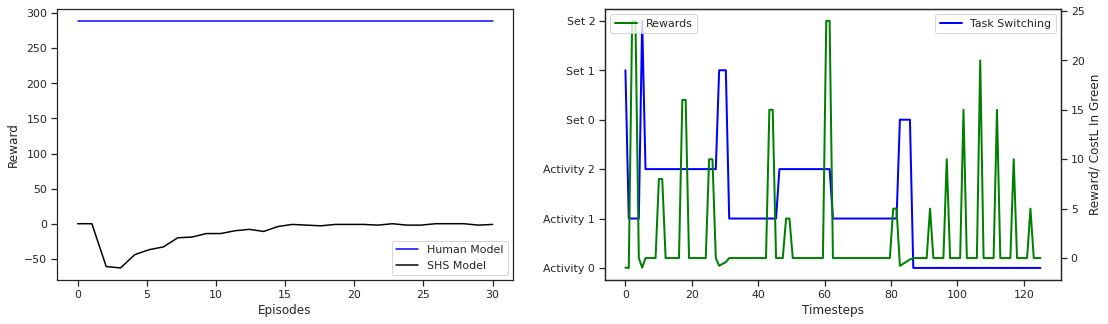

In [132]:

shsA_rewards, Ha_rewards,Hb_rewards, trigger, pmvHa,pmvHb, LOG, epsA = [], [], [],  0, [],  [], [],  30
s, e = 0, epsA
# s, e = epsA, epsA+50
sh = SHS(Ha, s, gamma=0.95, train=True)
sh.experience, sh.tempo = [], 0
Ha.alpha = 0
Hb.alpha = 0
Ha.epsilon = Hb.epsilon = 0
Ha.lr = 0
Hb.lr = 0
a1 = []
a2 = []
random.seed(156)
for i in range(s, e):
    sh.reset()
    env.reset()
    if i % 2 == 0:
        sh.Human = Ha
        loop = asyncio.get_event_loop()
        loop.run_until_complete(asyncio.wait([Ha.start(root_node, root_state, None)]))
    else:
        sh.Human = Hb
        loop = asyncio.get_event_loop()
        loop.run_until_complete(asyncio.wait([Hb.start(root_node, root_state, None)]))

    LOG.append(Ha.logA)
    shA = sh.score
    sh.decay(i, e)
    shsA_rewards.append(sh.score)
    Ha_rewards.append(Ha.sum)
    Hb_rewards.append(Hb.sum)
    if i%5==0 or i%6==0 or i%3==0: 
        print('Episode {:3d} | Model A:{:4.1f} | Model B: {:4.1f} | SHS: {:3.1f} | e: {:3.5f} | {:2d} |'.format(i, Ha.sum, Hb.sum, shA, Ha.epsilon, sh.a1_action))
    pmvHa.append(Ha.pmv)
    pmvHb.append(Hb.pmv)
sns.set_style("ticks")
if train or e != epsA + 60: 
    pass 
    logPlot(Ha, Ha_rewards, shsA_rewards)
    #logPlot(Hb, Hb_rewards, shsA_rewards)
else:
    logPlotSHS(Ha, Ha_rewards, shsA_rewards)
    logPlotSHS(Hb, Hb_rewards, shsA_rewards)
print(Ha.sum, Hb.sum)
epsA = e + 1

In [ ]:
#@title

#POMCP
class SHS_POMDP:
    def __init__:

    def search(self, history):
        while(True):
            model = sample(belief())
            self.simulate(state, model, history, 0)
        return np.argmax(Q[history, :])

    def simulate(self, s, h, depth):
        return None if (self.gamma**depth < self.e and self.depth != 0) else pass

        if not self.terminate(h):
            for a in self.actionSpace:
                self.expandFrom(h, a)
            update = self.rollout(s, depth)
            return update

        a = np.argmax(Q(history, a)) + c*math.sqrt(np.log(N(history)/N(history, a))
        o_, r_ = self.generate_sample(s, bestAction)
        R = r_ + self.gamma*self.simulate(s_, history + (best_Action, o_), depth+1)

        N(history) += 1
        N(history, best_action) += 1
        Q(history, best_Action) += (R - Q(history, best_action)/ N(history, best_action))

        # if history not in searchTree:
        #     searchTree[history] = (0, 0)
        #     for a in actions:
        #         searchTree[history, (a)] = (0, 0)
        #     return self.rollOut(s, history, depth)
        # temp = [searchTree[history, (a)] for a in actions]
        # elif (0, 0) in temp:
        #     best_action = np.where(temp, (0, 0))
        # else:
        #     best_action = np.argmax(Q(history, a)) + c*math.sqrt(np.log(N(history)/N(history, a))
        
        # R = r_ + self.gamma*self.simulate(s_, history + (best_Action, o_), depth+1)
        
        return R

def rollOut(self,s, history, depth):
    if depth > self.maxDepth or terminal(s):
        return
    bestAction = self.rollourPolicy(s, history, depth)
    (s_, o_, r_) = self.sample(s, bestAction)
    R = r_ + self.gamma*self.simulate(s_, history + (best_Action, o_), depth+1)
    return R


In [133]:
print(len(sh.experience))
# print(sh.tempo/len(sh.experience))
sh.tempo/sh.count #5350

2


0.896551724137931

In [131]:
from scipy import stats
from math import log
class SHS:
    def __init__(self, human_model, curr_eps, gamma=0.99, train=True):
        self.temp, self.hum = env.getTH(0)
        self.Human = human_model
        self.epsilon = 1
        self.curr_eps = curr_eps
        self.a1_Q = np.zeros([1900, 2])
        self.a2_Q = np.zeros([1900, 3])
        self.a1_action = 0
        self.a2_action = 0
        self.alpha_0 = self.a1_lr = self.a2_lr = 0.1
        self.a1_cS = 0
        self.a2_cS = 0
        self.a1_nS = 0
        self.a2_nS = 0
        self.train = True
        self.gamma = gamma
        self.agent_1 = []
        self.mu_temp_vector = []
        self.mu_activity = {0:[], 1:[], 2:[]}
        self.experience = []
        self.tempo = 0
        self.XX = []
        self.count = 0
        self.prev_score = 0
        self.mu_temp = self.temp
        self.history = []
        
        for task in range(3):
            for temp in range(15, 31):
                self.agent_1.append((task << 10) | temp )
        self.agent_2 = []
        for model in range(2):
            for task in range(3):
                for temp in range(15, 31):
                    self.agent_2.append((model << 20) | (task << 10) | temp )
        self.score = 0

    def reset(self):
        self.temp, self.hum = env.getTH(0)
        self.score = 0
        # self.count = 0
        self.mu_temp = self.temp
        self.mu_temp_vector = []
        self.mu_activity = {0:[], 1:[], 2:[]}
    
    def getState(self):
        self.temp, self.hum = env.getTH(0)
        a1_nS = a2_nS = 0
        if self.a1_action == 0:
            activity = self.Human.taskStack[-1] 
            a1_nS = (activity << 10) | self.temp
            a2_nS = (0 << 20) | (activity << 10) | self.temp
        else:
            activity = self.Human.taskStack[-1] 
            a1_nS = (activity << 10) | self.temp
            a2_nS = (1 << 20) | (activity << 10) | self.temp
        
        return (self.agent_1.index(a1_nS), self.agent_2.index(a2_nS))

    def get_State(self, action):
        self.temp, self.hum = env.getTH(0)
        if action == 0:
            activity = self.Human.taskStack[-1] 
            return self.agent_2.index((0 << 20) | (activity << 10) | self.temp)
        else:
            activity = self.Human.taskStack[-1] 
            return self.agent_2.index((1 << 20) | (activity << 10) | self.temp)

    def collect_data(self, human_action, human_activity):
        if human_action in [11, 12]:
            self.mu_temp = (self.mu_temp + log(self.temp))/2
            # self.mu_temp_vector.append(1*log(self.mu_temp))
            self.mu_activity[human_activity].append(log(self.mu_temp))

    def predict_human(self, episodic_check=False):
        p_val_list = []
        data_2 = np.array(self.mu_temp_vector)

        for i in self.experience:
            if not episodic_check:
                data_2 = np.array(self.mu_activity[self.Human.taskStack[-1]])
                data_1 = i[self.Human.taskStack[-1]]
            else:
                data_2 = np.array(self.mu_activity[0]+self.mu_activity[1]+self.mu_activity[2])
                data_1 = np.array(i[0]+i[1]+i[2])
            p_val = stats.ks_2samp(data_1, data_2)[1]
            p_val_list.append(p_val)
        # for i in self.experience:
        #     data_1 = np.array(i)
        #     p_val = stats.ks_2samp(data_1, data_2)[1]
        #     p_val_list.append(p_val)
        self.history.append([])
        return p_val_list

    def step(self, reward, done, human_action):
        self.temp, _ = env.getTH(0)
        if self.curr_eps == 0:
            self.collect_data(human_action, self.Human.taskStack[-1])
        elif human_action not in [7, 8]:
            self.collect_data(human_action, self.Human.taskStack[-1])
            self.a1_action = np.argmax(self.predict_human(episodic_check=False))
            self.count += 1
            self.tempo = self.tempo + 1 if self.a1_action == self.Human.flag-1 else self.tempo
            # print(self.predict_human())
            self.a1_nS, self.a2_nS = self.getState()
            # self.updateA1(reward, done)
            self.updateA2(reward, done)
            
    def updateA1(self, reward, done):
        # reward = 0 if self.a1_action == self.Human.flag-1 else -1
        val = np.array((reward)) if done else np.array((reward + self.gamma*np.max(self.a1_Q[self.a1_nS, :])))
        self.a1_Q[self.a1_cS, self.a1_action] = (1-self.a1_lr)*self.a1_Q[self.a1_cS, self.a1_action] + self.a1_lr*val
        self.score += 0.5*reward

    def updateA2(self, reward, done):
        val = np.array((reward)) if done else np.array((reward + self.gamma*np.max(self.a2_Q[self.a2_nS, :])))
        self.a2_Q[self.a2_cS, self.a2_action] = (1-self.a2_lr)*self.a2_Q[self.a2_cS, self.a2_action] + self.a2_lr*val
        self.score += reward

    def decay(self, x, eps):
        self.curr_eps = x
        q = 6*x
        self.a1_lr = self.a2_lr = self.alpha_0*math.exp(-q/eps)
        self.epsilon = max(0.001, math.exp(-q/eps))
        # if len(self.experience) == 0:
        #     self.experience.append(self.mu_temp_vector)
        # else:
        #     p_val_list = self.predict_human(episodic_check=False)
        #     if np.mean(p_val_list) < 0.05:
        #         self.experience.append(self.mu_temp_vector)
        if len(self.experience) == 0:
            self.experience.append(self.mu_activity)
        else:
            p_val_list = self.predict_human(episodic_check=True)
            if np.mean(p_val_list) < 0.05:
                self.experience.append(self.mu_activity)
                # self.experience.append(self.mu_temp_vector)

    def getAction(self, flag):
        self.a1_cS,_ = self.getState()
        # print(self.a1_cS == self.a1_nS)
        if self.train:
            # if random.random() < self.epsilon:
            #     self.a1_action = random.randint(0, 1)
            # else:
            #     self.a1_action = np.argmax(self.a1_Q[self.a1_cS, :])
            # self.a2_cS = self.get_State(self.a1_action)
            if random.random() < self.epsilon:
                self.a2_cS = self.get_State(self.a1_action)
                self.a2_action = random.randint(0, 2)
            else:
                self.a2_cS = self.get_State(self.a1_action)
                self.a2_action = np.argmax(self.a2_Q[self.a2_cS, :])
            return self.a2_action

Episode   0 | Model A:289.0 | Model B: 289.0 | SHS: 0.0 | e: 0.00000 |  0 |
Episode   1 | Model A:289.0 | Model B: 289.0 | SHS: 0.0 | e: 0.00000 |  0 |
Episode   2 | Model A:289.0 | Model B: 289.0 | SHS: -79.0 | e: 0.00000 |  0 |
Episode   3 | Model A:289.0 | Model B: 289.0 | SHS: -76.0 | e: 0.00000 |  0 |
Episode   4 | Model A:289.0 | Model B: 289.0 | SHS: -67.0 | e: 0.00000 |  0 |
Episode   5 | Model A:289.0 | Model B: 289.0 | SHS: -79.0 | e: 0.00000 |  0 |
Episode   6 | Model A:289.0 | Model B: 289.0 | SHS: -72.0 | e: 0.00000 |  0 |
Episode   7 | Model A:289.0 | Model B: 289.0 | SHS: -71.0 | e: 0.00000 |  0 |
Episode   8 | Model A:289.0 | Model B: 289.0 | SHS: -77.0 | e: 0.00000 |  0 |
Episode   9 | Model A:289.0 | Model B: 289.0 | SHS: -85.0 | e: 0.00000 |  0 |
Episode  10 | Model A:289.0 | Model B: 289.0 | SHS: -71.0 | e: 0.00000 |  0 |
Episode  11 | Model A:289.0 | Model B: 289.0 | SHS: -79.0 | e: 0.00000 |  0 |
Episode  12 | Model A:289.0 | Model B: 289.0 | SHS: -81.0 | e: 0.000

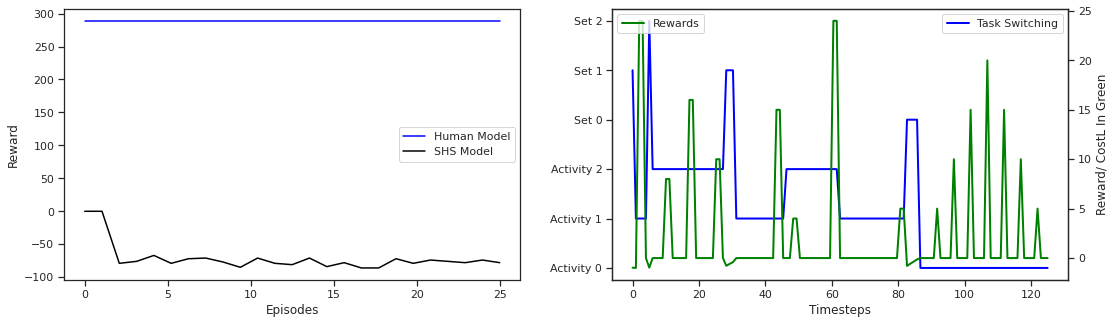

In [176]:

shsA_rewards, Ha_rewards,Hb_rewards, trigger, pmvHa,pmvHb, LOG, epsA = [], [], [],  0, [],  [], [],  25
s, e = 0, epsA
# s, e = epsA, epsA+50
sh = pSHS(Ha, s, gamma=0.95, train=True)
sh.experience, sh.tempo = [], 0
Ha.alpha = 0
Hb.alpha = 0
Ha.epsilon = Hb.epsilon = 0
Ha.lr = 0
Hb.lr = 0
a1 = []
a2 = []
random.seed(156)
for i in range(s, e):
    sh.reset()
    env.reset()
    if i % 2 == 0:
        sh.Human = Ha
        loop = asyncio.get_event_loop()
        loop.run_until_complete(asyncio.wait([Ha.start(root_node, root_state, None)]))
    else:
        sh.Human = Hb
        loop = asyncio.get_event_loop()
        loop.run_until_complete(asyncio.wait([Hb.start(root_node, root_state, None)]))

    LOG.append(Ha.logA)
    shA = sh.score
    sh.decay(i, e)
    shsA_rewards.append(sh.score)
    Ha_rewards.append(Ha.sum)
    Hb_rewards.append(Hb.sum)
    if i%1==0 or i%6==0 or i%3==0: 
        print('Episode {:3d} | Model A:{:4.1f} | Model B: {:4.1f} | SHS: {:3.1f} | e: {:3.5f} | {:2d} |'.format(i, Ha.sum, Hb.sum, shA, Ha.epsilon, 0))
    pmvHa.append(Ha.pmv)
    pmvHb.append(Hb.pmv)
sns.set_style("ticks")
if train or e != epsA + 60: 
    pass 
    logPlot(Ha, Ha_rewards, shsA_rewards)
    #logPlot(Hb, Hb_rewards, shsA_rewards)
else:
    logPlotSHS(Ha, Ha_rewards, shsA_rewards)
    logPlotSHS(Hb, Hb_rewards, shsA_rewards)
print(Ha.sum, Hb.sum)
epsA = e + 1

In [177]:
# sh.experience
print(len(sh.experience))
print(np.mean(sh.temp))
print(sh.temp)
sh.p_table
# sh.experience
# sh.curr_distribution
# sh.curr_eps
# sh.memory
# sh.eps_mu
# Ha.logA
# from scipy.spatial import distance
# distance.jensenshannon([1.0, 0.0, 0.0], [0.0, 1.0, 0.0], 2.0)
# distance.jensenshannon([1.0, 0.0], [1, 0.0])
# env.getTH(0)

2
0.2011565474080868
[0.0, 0.4023130948161736]


{'p_0': 0.9402315383724797, 'p_1': 0.05976846162752025}

In [174]:
import numpy as np
from scipy import stats
from scipy.spatial import distance
import random
env_2 = Environment()
class pSHS:
    def __init__(self, model, eps, gamma=0.95, train=True):
        self.Human = model
        self.curr_eps = eps
        self.temp, _ = env.getTH(0)
        self.params = {'mu_0': 25}
        self.eps_distribution = []
        self.eps_mu = 0
        self.experience = []
        self.p_table = {'p_0': 1, 'p_1': 0}
        self.e = 1
        self.lr = self.lr_0 = 0.1
        self.Q_0 = np.zeros([2000, 3])
        self.Q_1 = np.zeros([2000, 3])
        self.weighted_Q = np.zeros([2000, 3])
        self.score = 0
        self.gamma = gamma
        self.states = []
        self.human_action = 0
        self.train = train
        self.curr_action = 0
        self.cState = 0
        self.temp = []
        for task in range(3):
            for temp in range(15, 31):
                self.states.append((task << 10) | temp )
    
    def reset(self):
        self.curr_distribution = 0
        self.memory = []
        self.score = 0
        self.temp = 0

    def getState(self):
        self.temp, _ = env.getTH(0)
        activity = self.Human.taskStack[-1] 
        cS = (activity << 10) | self.temp
        return self.states.index(cS)

    def step(self, reward, done, human_action):
        env_2.getTH(human_action)
        self.temp,_ = env.getTH(0)
        if human_action in [11, 12] and self.curr_eps == 0:
            self.memory.append(self.temp)
            self.eps_mu = np.mean(self.memory)
            self.curr_distribution = stats.multivariate_normal(self.eps_mu, 1).pdf(self.memory)
        elif human_action in [11, 12]:
            self.memory.append(self.temp)
            self.eps_mu = np.mean(self.memory)
            self.curr_distribution = stats.multivariate_normal(self.eps_mu, 1).pdf(self.memory)
            if len(self.experience) > 1:
                mu_0 = self.params['mu_0']
                mu_1 = self.params['mu_1']
                self.p_table['p_0'] = np.exp(0.5*(2*self.temp-mu_0-mu_1)*(mu_0-mu_1)) / (1 + np.exp(0.5*(2*self.temp-mu_0-mu_1)*(mu_0-mu_1)))
                self.p_table['p_1'] = 1 - self.p_table['p_0']
            self.human_action = human_action
            self.compute_Q(reward)

    def compute_Q(self, R):
        a = self.curr_action
        cS = self.cState
        nS = self.getState()
        p_0 = self.p_table['p_0']
        p_1 = self.p_table['p_1']
        V_0 = R*p_0 if done else R*p_0 + self.gamma*np.max(self.Q_0[nS, :])
        V_1 = R*p_1 if done else R*p_1 + self.gamma*np.max(self.Q_1[nS, :])
        self.Q_0[cS, a] = (1-self.lr)*self.Q_0[cS, a] + self.lr*V_0
        self.Q_1[cS, a] = (1-self.lr)*self.Q_1[cS, a] + self.lr*V_1
        self.weighted_Q[cS, a] = p_0*self.Q_0[cS, a] + p_1*self.Q_1[cS, a]
        self.score += R

    def update(self):
        jensen_distance = []
        jensen_threshold = 0.2011
        if len(self.experience) == 0:
            self.experience.append(self.curr_distribution)
        else:
            for distribution in self.experience:
                limit = min(len(distribution), len(self.curr_distribution))
                j_d = distance.jensenshannon(distribution[0:limit], self.curr_distribution[0:limit])
                jensen_distance.append(j_d)
            if 0 not in jensen_distance:# jensen_threshold:
                self.params['mu_'+str(len(self.experience))] = self.eps_mu
                self.experience.append(self.curr_distribution)
        self.temp = jensen_distance.copy()
            
    def getAction(self, flag):
        cS = self.getState()
        self.cState = cS
        if np.random.random() < self.e:
            self.curr_action = random.randint(0, 2)
            return self.curr_action
        else:
            self.curr_action = np.argmax(self.weighted_Q[cS, :])
            return self.curr_action

    def decay(self, curr_episode, net_episodes):
        self.curr_eps = curr_episode
        q = 6*curr_episode
        self.lr = self.lr_0*math.exp(-q/net_episodes)
        self.epsilon = max(0.001, math.exp(-q/net_episodes))
        self.update()
      


In [ ]:
#@title
from scipy import stats
from math import log
class SHS:
    def __init__(self, human_model, curr_eps, gamma=0.99, train=True):
        self.temp, self.hum = env.getTH(0)
        self.Human = human_model
        self.epsilon = 1
        self.curr_eps = curr_eps
        self.a1_Q = np.zeros([1900, 2])
        self.a2_Q = np.zeros([1900, 3])
        self.a1_action = 0
        self.a2_action = 0
        self.alpha_0 = self.a1_lr = self.a2_lr = 0.1
        self.a1_cS = 0
        self.a2_cS = 0
        self.a1_nS = 0
        self.a2_nS = 0
        self.train = True
        self.gamma = gamma
        self.agent_1 = []
        self.mu_temp_vector = []
        self.mu_activity = {0:[], 1:[], 2:[]}
        self.experience = []
        self.tempo = 0
        self.XX = []
        self.count = 0
        self.prev_score = 0
        self.mu_temp = self.temp
        
        for task in range(3):
            for temp in range(15, 31):
                self.agent_1.append((task << 10) | temp )
        self.agent_2 = []
        for model in range(2):
            for task in range(3):
                for temp in range(15, 31):
                    self.agent_2.append((model << 20) | (task << 10) | temp )
        self.score = 0

    def reset(self):
        self.temp, self.hum = env.getTH(0)
        self.score = 0
        # self.count = 0
        self.mu_temp = self.temp
        self.mu_temp_vector = []
        self.mu_activity = {0:[], 1:[], 2:[]}
    
    def getState(self):
        self.temp, self.hum = env.getTH(0)
        a1_nS = a2_nS = 0
        if self.a1_action == 0:
            activity = self.Human.taskStack[-1] 
            a1_nS = (activity << 10) | self.temp
            a2_nS = (0 << 20) | (activity << 10) | self.temp
        else:
            activity = self.Human.taskStack[-1] 
            a1_nS = (activity << 10) | self.temp
            a2_nS = (1 << 20) | (activity << 10) | self.temp
        
        return (self.agent_1.index(a1_nS), self.agent_2.index(a2_nS))

    def get_State(self, action):
        self.temp, self.hum = env.getTH(0)
        if action == 0:
            activity = self.Human.taskStack[-1] 
            return self.agent_2.index((0 << 20) | (activity << 10) | self.temp)
        else:
            activity = self.Human.taskStack[-1] 
            return self.agent_2.index((1 << 20) | (activity << 10) | self.temp)

    def collect_data(self, human_action, human_activity):
        if human_action in [11, 12]:
            self.mu_temp = (self.mu_temp + log(self.temp))/2
            # self.mu_temp_vector.append(1*log(self.mu_temp))
            self.mu_activity[human_activity].append(log(self.mu_temp))

    def predict_human(self, episodic_check=False):
        p_val_list = []
        data_2 = np.array(self.mu_temp_vector)

        for i in self.experience:
            if not episodic_check:
                data_2 = np.array(self.mu_activity[self.Human.taskStack[-1]])
                data_1 = i[self.Human.taskStack[-1]]
            else:
                data_2 = np.array(self.mu_activity[0]+self.mu_activity[1]+self.mu_activity[2])
                data_1 = np.array(i[0]+i[1]+i[2])
            p_val = stats.ks_2samp(data_1, data_2)[1]
            p_val_list.append(p_val)
        # for i in self.experience:
        #     data_1 = np.array(i)
        #     p_val = stats.ks_2samp(data_1, data_2)[1]
        #     p_val_list.append(p_val)
        return p_val_list

    def step(self, reward, done, human_action):
        self.temp, _ = env.getTH(0)
        if self.curr_eps == 0:
            self.collect_data(human_action, self.Human.taskStack[-1])
        elif human_action not in [7, 8]:
            self.collect_data(human_action, self.Human.taskStack[-1])
            self.a1_action = np.argmax(self.predict_human(episodic_check=False))
            self.count += 1
            self.tempo = self.tempo + 1 if self.a1_action == self.Human.flag-1 else self.tempo
            # print(self.predict_human())
            self.a1_nS, self.a2_nS = self.getState()
            # self.updateA1(reward, done)
            self.updateA2(reward, done)
            
    def updateA1(self, reward, done):
        # reward = 0 if self.a1_action == self.Human.flag-1 else -1
        val = np.array((reward)) if done else np.array((reward + self.gamma*np.max(self.a1_Q[self.a1_nS, :])))
        self.a1_Q[self.a1_cS, self.a1_action] = (1-self.a1_lr)*self.a1_Q[self.a1_cS, self.a1_action] + self.a1_lr*val
        self.score += 0.5*reward

    def updateA2(self, reward, done):
        val = np.array((reward)) if done else np.array((reward + self.gamma*np.max(self.a2_Q[self.a2_nS, :])))
        self.a2_Q[self.a2_cS, self.a2_action] = (1-self.a2_lr)*self.a2_Q[self.a2_cS, self.a2_action] + self.a2_lr*val
        self.score += reward

    def decay(self, x, eps):
        self.curr_eps = x
        q = 6*x
        self.a1_lr = self.a2_lr = self.alpha_0*math.exp(-q/eps)
        self.epsilon = max(0.001, math.exp(-q/eps))
        if len(self.experience) == 0:
            self.experience.append(self.mu_activity)
        else:
            p_val_list = self.predict_human(episodic_check=True)
            if np.mean(p_val_list) < 0.05:
                self.experience.append(self.mu_activity)
                # self.experience.append(self.mu_temp_vector)

    def getAction(self, flag):
        self.a1_cS,_ = self.getState()
        if self.train:
            if random.random() < self.epsilon:
                self.a2_cS = self.get_State(self.a1_action)
                self.a2_action = random.randint(0, 2)
            else:
                self.a2_cS = self.get_State(self.a1_action)
                self.a2_action = np.argmax(self.a2_Q[self.a2_cS, :])
            return self.a2_action

In [ ]:
#@title
from scipy import stats
from math import log
class SHS:
    def __init__(self, human_model, curr_eps, gamma=0.99, train=True):
        self.temp, self.hum = env.getTH(0)
        self.Human = human_model
        self.epsilon = 1
        self.curr_eps = curr_eps
        self.a1_Q = np.zeros([1900, 2])
        self.a2_Q = np.zeros([1900, 3])
        self.a1_action = 0
        self.a2_action = 0
        self.alpha_0 = self.a1_lr = self.a2_lr = 0.1
        self.a1_cS = 0
        self.a2_cS = 0
        self.a1_nS = 0
        self.a2_nS = 0
        self.train = True
        self.gamma = gamma
        self.agent_1 = []
        self.mu_temp_vector = []
        self.observation_2 = []
        self.experience = []
        self.reward_exp = []
        self.reward_rec = []
        self.tempo = 0
        self.qu1 = 0
        self.qu2 = 0
        self.XX = []
        self.count = 0
        self.prev_score = 0
        self.mu_temp = self.temp
        
        for task in range(3):
            for temp in range(15, 31):
                self.agent_1.append((task << 10) | temp )
        self.agent_2 = []
        for model in range(2):
            for task in range(3):
                for temp in range(15, 31):
                    self.agent_2.append((model << 20) | (task << 10) | temp )
        self.score = 0

    def reset(self):
        self.temp, self.hum = env.getTH(0)
        self.score = 0
        # self.count = 0
        self.mu_temp = self.temp
        self.mu_temp_vector = []
    
    def getState(self):
        self.temp, self.hum = env.getTH(0)
        a1_nS = a2_nS = 0
        if self.a1_action == 0:
            activity = self.Human.taskStack[-1] 
            a1_nS = (activity << 10) | self.temp
            a2_nS = (0 << 20) | (activity << 10) | self.temp
        else:
            activity = self.Human.taskStack[-1] 
            a1_nS = (activity << 10) | self.temp
            a2_nS = (1 << 20) | (activity << 10) | self.temp
        
        return (self.agent_1.index(a1_nS), self.agent_2.index(a2_nS))

    def get_State(self, action):
        self.temp, self.hum = env.getTH(0)
        if action == 0:
            activity = self.Human.taskStack[-1] 
            return self.agent_2.index((0 << 20) | (activity << 10) | self.temp)
        else:
            activity = self.Human.taskStack[-1] 
            return self.agent_2.index((1 << 20) | (activity << 10) | self.temp)

    def collect_data(self, human_action):
        if human_action in [11, 12]:
            # self.count += 1
            self.mu_temp = (self.mu_temp + self.temp)/2
            self.mu_temp_vector.append(self.mu_temp)

    def predict_human(self):
        p_val_list = []
        data_2 = np.array(self.mu_temp_vector)
        for i in self.experience:
            data_1 = np.array(i)
            p_val = stats.ks_2samp(data_1, data_2)[1]
            p_val_list.append(p_val)
        return p_val_list

    def step(self, reward, done, human_action):
        self.temp, _ = env.getTH(0)
        if self.curr_eps == 0:
            self.collect_data(human_action)
        elif human_action not in [7, 8]:
            self.collect_data(human_action)
            self.a1_action = np.argmax(self.predict_human())
            self.count += 1
            self.tempo = self.tempo + 1 if self.a1_action == self.Human.flag-1 else self.tempo
            # print(self.predict_human())
            self.a1_nS, self.a2_nS = self.getState()
            # self.updateA1(reward, done)
            self.updateA2(reward, done)
            
    def updateA1(self, reward, done):
        # reward = 0 if self.a1_action == self.Human.flag-1 else -1
        val = np.array((reward)) if done else np.array((reward + self.gamma*np.max(self.a1_Q[self.a1_nS, :])))
        self.a1_Q[self.a1_cS, self.a1_action] = (1-self.a1_lr)*self.a1_Q[self.a1_cS, self.a1_action] + self.a1_lr*val
        self.score += 0.5*reward

    def updateA2(self, reward, done):
        val = np.array((reward)) if done else np.array((reward + self.gamma*np.max(self.a2_Q[self.a2_nS, :])))
        self.a2_Q[self.a2_cS, self.a2_action] = (1-self.a2_lr)*self.a2_Q[self.a2_cS, self.a2_action] + self.a2_lr*val
        self.score += 0.5*reward

    def decay(self, x, eps):
        self.curr_eps = x
        q = 6*x
        self.a1_lr = self.a2_lr = self.alpha_0*math.exp(-q/eps)
        self.epsilon = max(0.001, math.exp(-q/eps))
        if len(self.experience) == 0:
            self.experience.append(self.mu_temp_vector)
        else:
            p_val_list = self.predict_human()
            # print(p_val_list)
            if np.mean(p_val_list) < 0.05:
                self.experience.append(self.mu_temp_vector)

    def getAction(self, flag):
        self.a1_cS,_ = self.getState()
        # print(self.a1_cS == self.a1_nS)
        if self.train:
            # if random.random() < self.epsilon:
            #     self.a1_action = random.randint(0, 1)
            # else:
            #     self.a1_action = np.argmax(self.a1_Q[self.a1_cS, :])
            # self.a2_cS = self.get_State(self.a1_action)
            if random.random() < self.epsilon:
                self.a2_cS = self.get_State(self.a1_action)
                self.a2_action = random.randint(0, 2)
            else:
                self.a2_cS = self.get_State(self.a1_action)
                self.a2_action = np.argmax(self.a2_Q[self.a2_cS, :])
            return self.a2_action

In [ ]:
#@title


In [ ]:
#@title

def totalTransitions(s, a):
    nT = 0
    for i in alpha[s, :, a]:
        nT += i
    return nT

def totalObservation(s, a):
    nO = 0
    for i in beta[s, :, a]:
        nO += i
    return nO

def Sp(b):
    set = [], t_ = [], o_ = []
    net = []
    for s in range(b.shape[0]):
        for inda, alpha_ in enumerate(b[s, :, :]):
            for indb, beta_ in enumerate(alpha_):
                if beta_ > 0:
                    t_.append(inda)
                    o_.append(indb)
                    set.append(s)
                    net.append((s, inda, indb))
    return net

for i in range(a.shape[0]):
    for j in a[i, :, :]:
        for k in j:
            print(k)
            print('ok') 
def belief_update(b, a, z):
    #alp: count vector
    #bet: count vector
    b[s_, alpha[s_, a], beta[s_, a]], n = 0, 0
    for s, al, be in Sp(b):
        nT = totalTransitions(s, a)
        for s_ in States:
            alpha[s, s_, a] += 1
            beta[s_, z, a] += 1
            nO = totalObservation(s_, a)
            tmp = b(s, al, be)*(alpha[s, a]/nT)*(beta[s, a]/nO)
            b(s_, alpha[s, s_, a], beta[s_, z, a]) += tmp 
            n += tmp
    return b(s_, alpha[s_, a], beta[s_, a])/n

def RTBSS(b, k, n):
    #input: b: the current belief state
           #k: the remaining depth of the search to perform
           #n: the number of probable states we keep in the belief state
    #static: K: the total depth of the search
           #actionT oDo: Next action to perform in the environment
    if k == 0:
        return np.max(R[b, :])
    maxQ = -99999
    for a in actions:
        Q_a = R[b, a]
        for obs in observations:
            Q_a += gamma*P*belief_update(, k-1, n)
        if Q_a > maxQ:
            maxQ = Q_a
            argM_action = a
    if k = K:
        action = argM_action
    return maxQ 
        

SyntaxError: ignored

In [ ]:
t4 = []
h = []
i = 25
while i < 30:
    for j in range(30, 70, 1):
        k = pmv_ppd(tdb=i, tr=25, vr=0.0, rh=j, met=1, clo=0.5, wme=0, standard="ASHRAE")['pmv']
        if -abs(k)>-0.5:
            t4.append(k)
    i += 0.25
t4

In [ ]:
pmv_ppd(tdb=28, tr=25, vr=0.0, rh=50, met=1, clo=0.5, wme=0, standard="ASHRAE")['pmv']

0.27

In [42]:
#@title
class p_SHS:
    def __init__(self):
        self.temp,_ = env.getTH(0)
        self.pH = np.random.normal(25, 1, 10)
        self.memory = []
        self.parameters = {'P':np.random.uniform(0, 1), 'mu_1':self.pH, 'mu_2':self.pH}

    def fit(self, parameters):
        while(True):
            p_x, p_y = self._compute_expectation(parameters)
            self._compute_maximization(p_x, p_y, parameters)

    def _compute_expectation(self, parameters):
        P = parameters['P']
        mu_1 = parameters['mu_1']
        mu_2 = parameters['mu_2']
        K = (1 - P) * stats.multivariate_normal(mu_1, 1).pdf(self.memory) + P * stats.multivariate_normal(mu_2, 2).pdf(self.memory)
        p_x = P * stats.multivariate_normal(mu_1, 1).pdf(self.memory) / K
        p_y = (1 - P) * stats.multivariate_normal(mu_2, 1).pdf(self.memory) / K
        return p_x, p_y

    def _compute_maximization(self):
        sum_x = np.sum(p_x)
        sum_y = np.sum(p_y)
        mu_1 = p_x.T.dot(self.memory)/sum_x
        mu_2 = p_y.T.dot(self.memory)/sum_y
        p = sum_x/p_x.shape[0]
        self.parameters = {'p':p, 'mu_1':mu_1, 'mu_2':mu_2}

{'a': 1, 'b': 3}

In [61]:
a = [1,2,3]
len(a)

3

In [20]:
import numpy as np
from scipy import stats
from scipy.special import logsumexp
x = [1,2,3,4,5]
np.log([1-0.6, 0.4])[np.newaxis, ...]
log_p_y_x = np.log([1-0.6, 0.6])[np.newaxis, ...] + \
                np.log([stats.multivariate_normal(2, 2).pdf(x),
            stats.multivariate_normal(3, 2).pdf(x)]).T
log_p_y_x_norm = logsumexp(log_p_y_x, axis=1)
np.exp(log_p_y_x - log_p_y_x_norm[..., np.newaxis])

array([[0.58529168, 0.41470832],
       [0.46121182, 0.53878818],
       [0.34175905, 0.65824095],
       [0.23949227, 0.76050773],
       [0.16037169, 0.83962831]])

In [23]:
0.6*stats.multivariate_normal(3, 2).pdf(x)/(0.4*stats.multivariate_normal(2, 2).pdf(x) + 0.6*stats.multivariate_normal(3, 2).pdf(x))
0.4*stats.multivariate_normal(2, 2).pdf(x)/(0.4*stats.multivariate_normal(2, 2).pdf(x) + 0.6*stats.multivariate_normal(3, 2).pdf(x))

array([0.58529168, 0.46121182, 0.34175905, 0.23949227, 0.16037169])

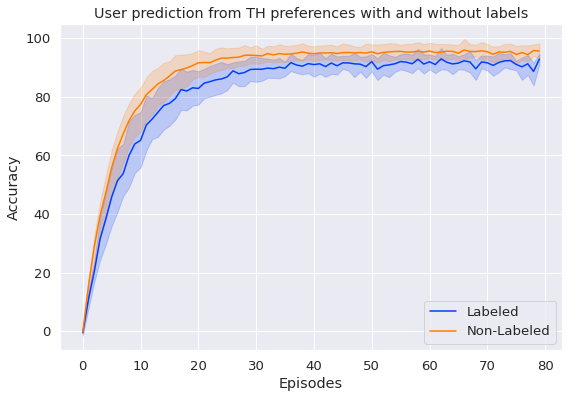

In [ ]:
#@title
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import math
import random
# y = (1-math.exp**{-0.03*x})/0.012 k = (1-math.pow(2.71, -0.10*i))/0.028 (1-math.pow(2.71, -0.20*i))/0.025
fig, ax = plt.subplots()
x = []
y = []
for i in range (80):
    x.append(i)
    k = (1-math.pow(2.71, -0.20*i))/0.021
    k += (random.normalvariate(k, (np.random.randint(0, 80)-i)/20))
    y.append(k)
from sklearn import preprocessing
import pandas as pd
# data2 = pd.DataFrame()
for i, j in zip(x, y):
    data2 = data2.append(pd.DataFrame(np.array([[i, j]]), columns = ['X','Y']), ignore_index=True)
sns.set(font_scale=1.2, palette='bright')
data2.columns = ['X','Y']
sns.lineplot('X','Y', data=data2, ax=ax, label='Labeled')
sns.lineplot('X','Y', data=data, ax=ax, label='Non-Labeled')
ax.set_xlabel('Episodes')
ax.set_ylabel('Accuracy')
ax.set_title('User prediction from TH preferences with and without labels')
fig.set_size_inches(9, 6)
# sns.lineplot(x, y)
# data
data.to_csv('Labeled_Non_Labelled.csv', index=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


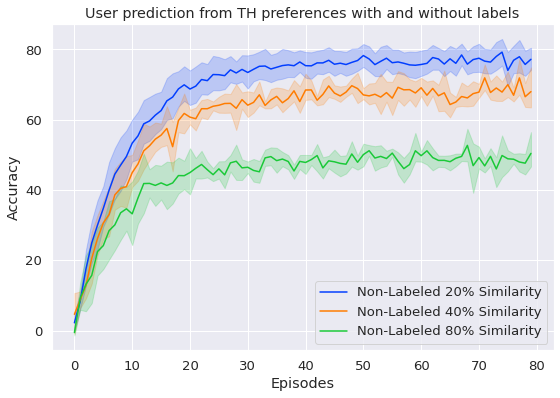

In [ ]:
#@title
fig, ax = plt.subplots()
x = []
y = []
for i in range (80):
    x.append(i)
    k = (1-math.pow(2.71, -0.10*i))/0.04
    k += (random.normalvariate(k, (np.random.randint(0, 80)-i)/10))
    y.append(k)
from sklearn import preprocessing
import pandas as pd
# data4 = pd.DataFrame()
# for i, j in zip(x, y):
#     data4 = data4.append(pd.DataFrame(np.array([[i, j]]), columns = ['X','Y']), ignore_index=True)
sns.set(font_scale=1.2, palette='bright')
data3.columns = ['X','Y']
# sns.lineplot('X','Y', data=data2, ax=ax, label='Labeled')
sns.lineplot('X','Y', data=data, ax=ax, label='Non-Labeled 20% Similarity')
sns.lineplot('X','Y', data=data3, ax=ax, label='Non-Labeled 40% Similarity')
sns.lineplot('X','Y', data=data4, ax=ax, label='Non-Labeled 80% Similarity')
ax.set_xlabel('Episodes')
ax.set_ylabel('Accuracy')
ax.set_title('User prediction from TH preferences with and without labels')
fig.set_size_inches(9, 6)
data.to_csv('Non_Labelled_All.csv', index=False)